<a href="https://colab.research.google.com/github/sumayaaktersumu/BMI_CALCULATOR_VERsion2.2/blob/main/_mobile_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# import required libraries for visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sn
# import required libraries clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mdata=pd.read_csv("/content/drive/MyDrive/final year  thesis/train.csv")

In [ ]:
mdata.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
mdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
 mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mdata

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
mdata.shape

(2000, 21)

In [ ]:
desdata=mdata.iloc[:,:-1]
desdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


checking for null values

In [ ]:
df_null = mdata.isnull().sum()
df_null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
mdata.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

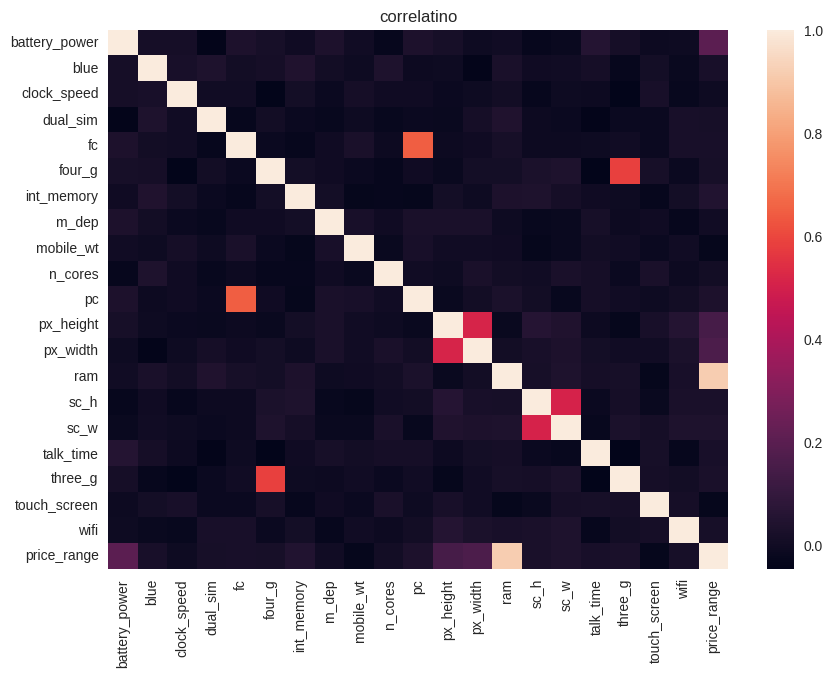

In [ ]:
plt.figure(figsize=(10,7))
dfcorr=mdata.corr()
sn.heatmap(dfcorr);
plt.title("correlatino");

Following histogram shows distribution of ram values according to price range.

In 0 class(low cost) Ram values are changing between 0- 2000 megabytes

In 1 class(medium cost) Ram values are changing between 0-3000 megabytes

In 2 class(high cost) Ram values are changing between 1000-4000 mb

In 3 class(very high cost) Ram values are changing between 2000 and 4000 mb( mostly 3500-4000 mb)

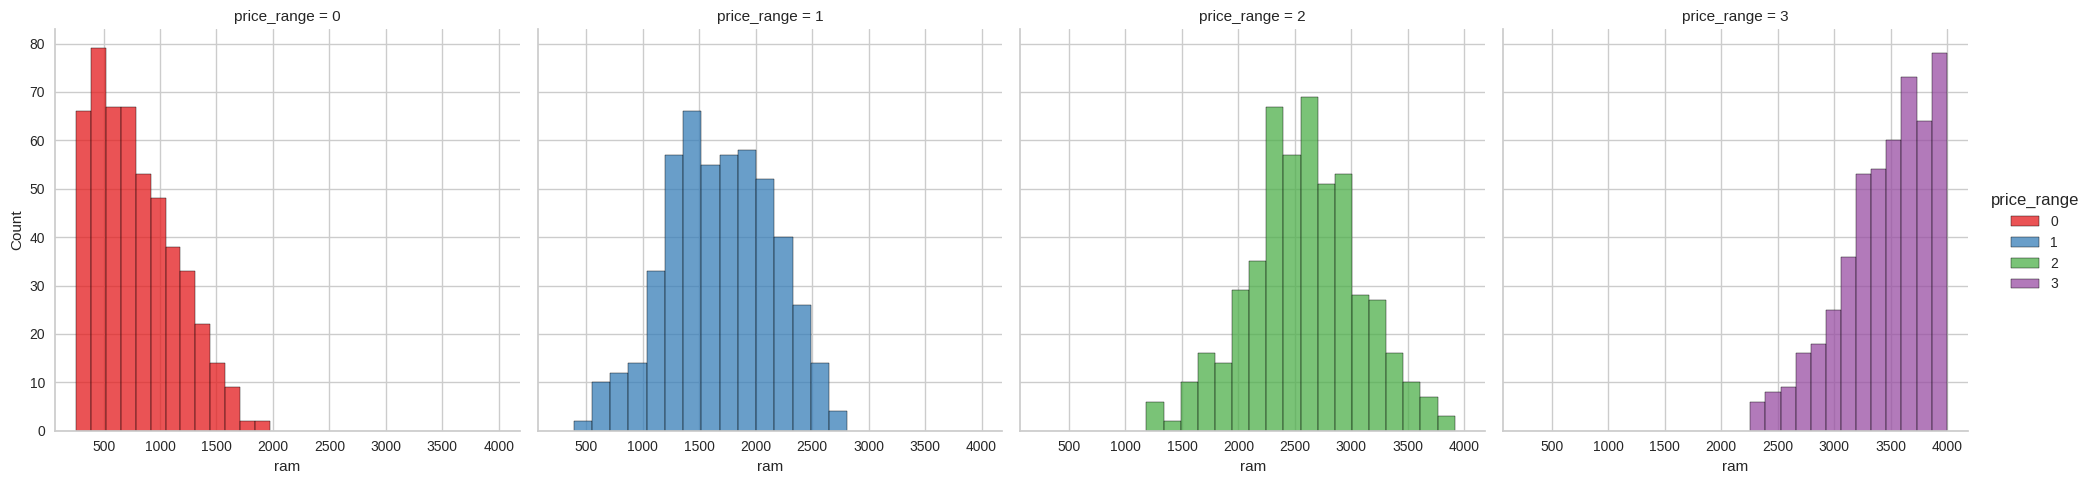

In [ ]:
g = sn.FacetGrid(mdata,col="price_range", hue="price_range", palette="Set1",height=5)
g.map(sn.histplot, 'ram');
g.add_legend();

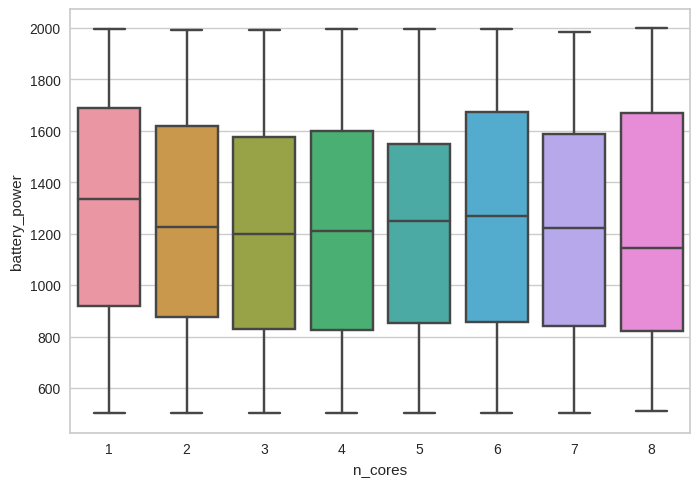

In [ ]:
sn.boxplot(data=mdata, x=mdata['n_cores'], y=mdata['battery_power']);

**CLUSTERING** & **MODELING**

In [ ]:
X=mdata.drop('price_range', axis=1)
y=mdata['price_range']
X.shape

(2000, 20)

In [ ]:
#1.0.0 instantiate
scaler=StandardScaler()
#1.0.1 fit_transform
mdata_scaled = scaler.fit_transform(X)
mdata_scaled.shape

(2000, 20)

In [ ]:
kmeans=KMeans(n_clusters=5, max_iter=300)
kmeans.fit(mdata_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
kmeans.inertia_

33322.37060879845

In [ ]:
kmeans.cluster_centers_

array([[-0.10414819,  0.0606697 ,  0.0112977 , -0.02700487, -0.28327155,
         0.38135272,  0.08313499, -0.08467911, -0.18403086,  0.04991406,
        -0.18811444, -0.54931837, -0.52731631, -0.09732609,  0.87622637,
         0.91864907, -0.17238468,  0.55964063, -0.09933512, -0.01133444],
       [ 0.10796633, -0.02682854,  0.06544175, -0.06150402,  1.48990097,
         0.22066019, -0.15840732, -0.05322727,  0.11415259, -0.02815999,
         1.10667741, -0.02245068, -0.05953632,  0.12308518, -0.18037114,
        -0.26261528,  0.07110794,  0.47987287,  0.09881764,  0.04549454],
       [ 0.06706067, -0.070512  ,  0.02986046,  0.11661427, -0.51599076,
         0.30473949, -0.00641718,  0.02919953,  0.03271414, -0.09695913,
        -0.4013739 , -0.44609621, -0.23667073,  0.00217531, -0.77794159,
        -0.64796439,  0.09106938,  0.55964063, -0.02718693, -0.16232099],
       [-0.03355549,  0.0667719 ,  0.05515923,  0.03340778, -0.06325872,
        -1.04396559,  0.01717521,  0.0333065 ,  

In [ ]:
kmeans.n_iter_

25

In [ ]:
kmeans.n_features_in_

20

In [ ]:
cluster_labels=kmeans.labels_
cluster_labels

array([3, 4, 4, ..., 2, 0, 0], dtype=int32)

In [ ]:
silhoutte_avg=silhouette_score(mdata_scaled,cluster_labels )
print("The silhouette score is: {0}".format(silhoutte_avg))

The silhouette score is: 0.05380066508038019


In [ ]:
sse=[]
s_score=[]
max_k=5
for num_custer in range(2,max_k):
  model=KMeans(n_clusters=num_custer, max_iter=60)
  model.fit(mdata_scaled)
  # SSE:Store inertia value
  sse.append(model.inertia_)
  #silhouette_score
  sc=silhouette_score(mdata_scaled, model.labels_, sample_size=1000)
  s_score.append(sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


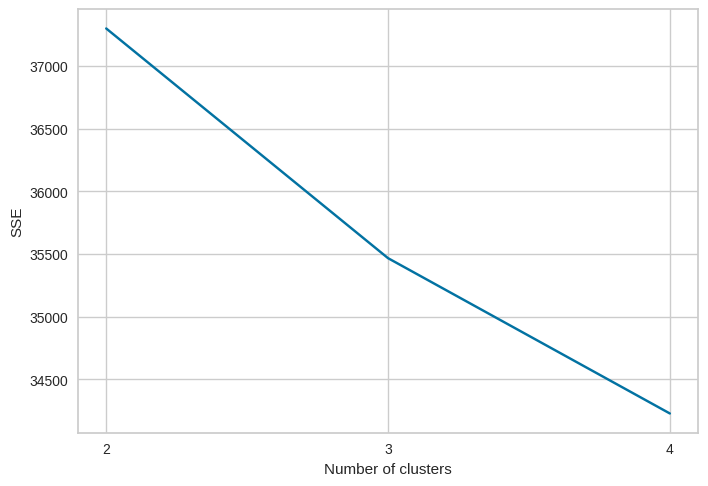

In [ ]:
plt.plot(range(2,max_k), sse )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
s_score









[0.06640236378326125, 0.0649348257716508, 0.05508633509775598]

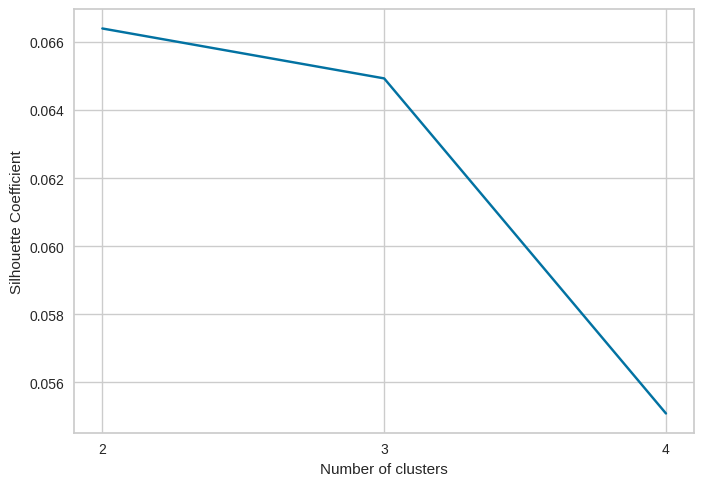

In [ ]:
#5.1.4 Analysing silhouette score on plot
plt.plot(range(2,max_k), s_score )
plt.xticks(range(2,max_k))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [ ]:
#6.0.0 Silhouette score for samples
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print("The sample_silhouette_values: {0}".format(sample_silhouette_values))

The sample_silhouette_values: [-0.12963916  0.12466466  0.15010302 ... -0.07915661  0.06946674
 -0.03531048]


In [ ]:
#6.0.1 silhouette plotting
visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

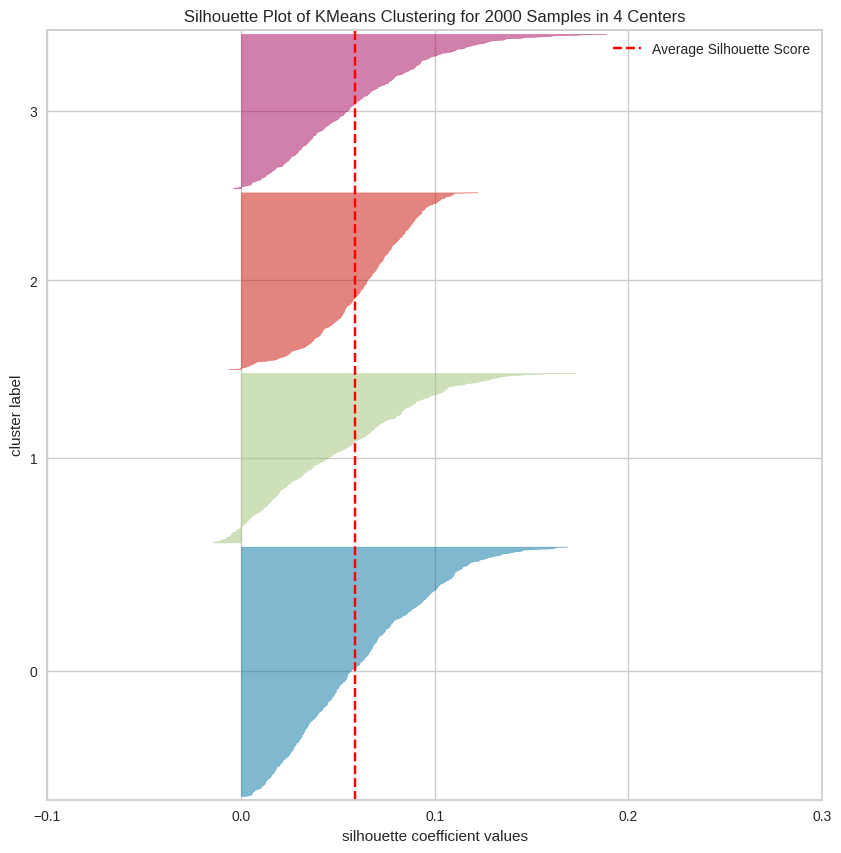

In [ ]:
#6.0.2 Trainning the module data
fig=plt.figure(figsize=(10,10));
visualizer.fit(mdata_scaled);
visualizer.show();


**KNN**

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/final year  thesis/train.csv")

In [ ]:
train.shape

(2000, 21)

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train.price_range.nunique()

4

In [ ]:
train.price_range.unique()

array([1, 2, 3, 0])

In [ ]:
X = train.drop('price_range',axis = 1)
y = train['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predicted)
accuracy

0.9212121212121213

In [ ]:
print(f'This Model is {accuracy} Acccurate')

This Model is 0.9212121212121213 Acccurate


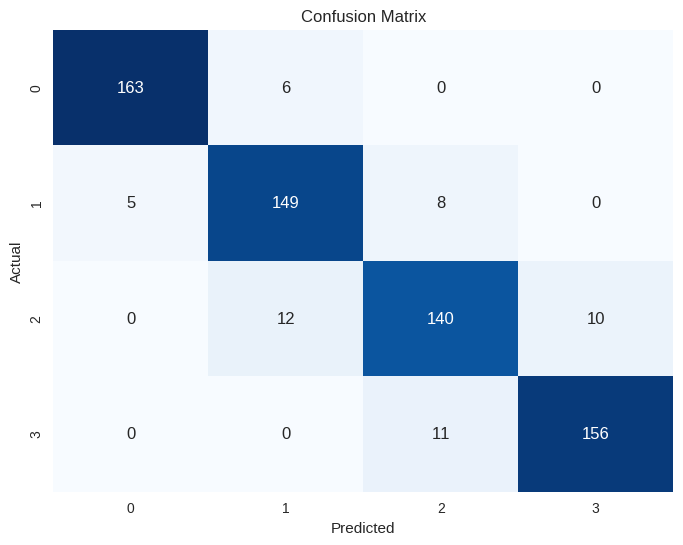

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**nural** **network**

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential


import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/final year  thesis/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/final year  thesis/test.csv')

In [ ]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print(df_test.columns)
print(df_train.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df_train.shape


(2000, 21)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

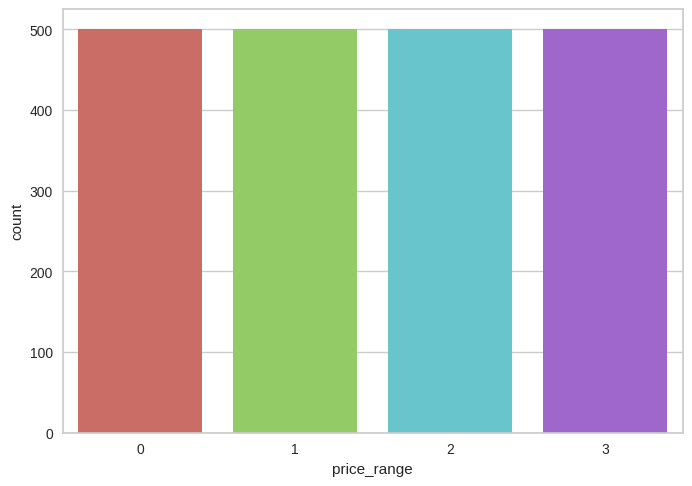

In [ ]:
sns.countplot(x = 'price_range',data=df_train,palette = 'hls')
plt.show()


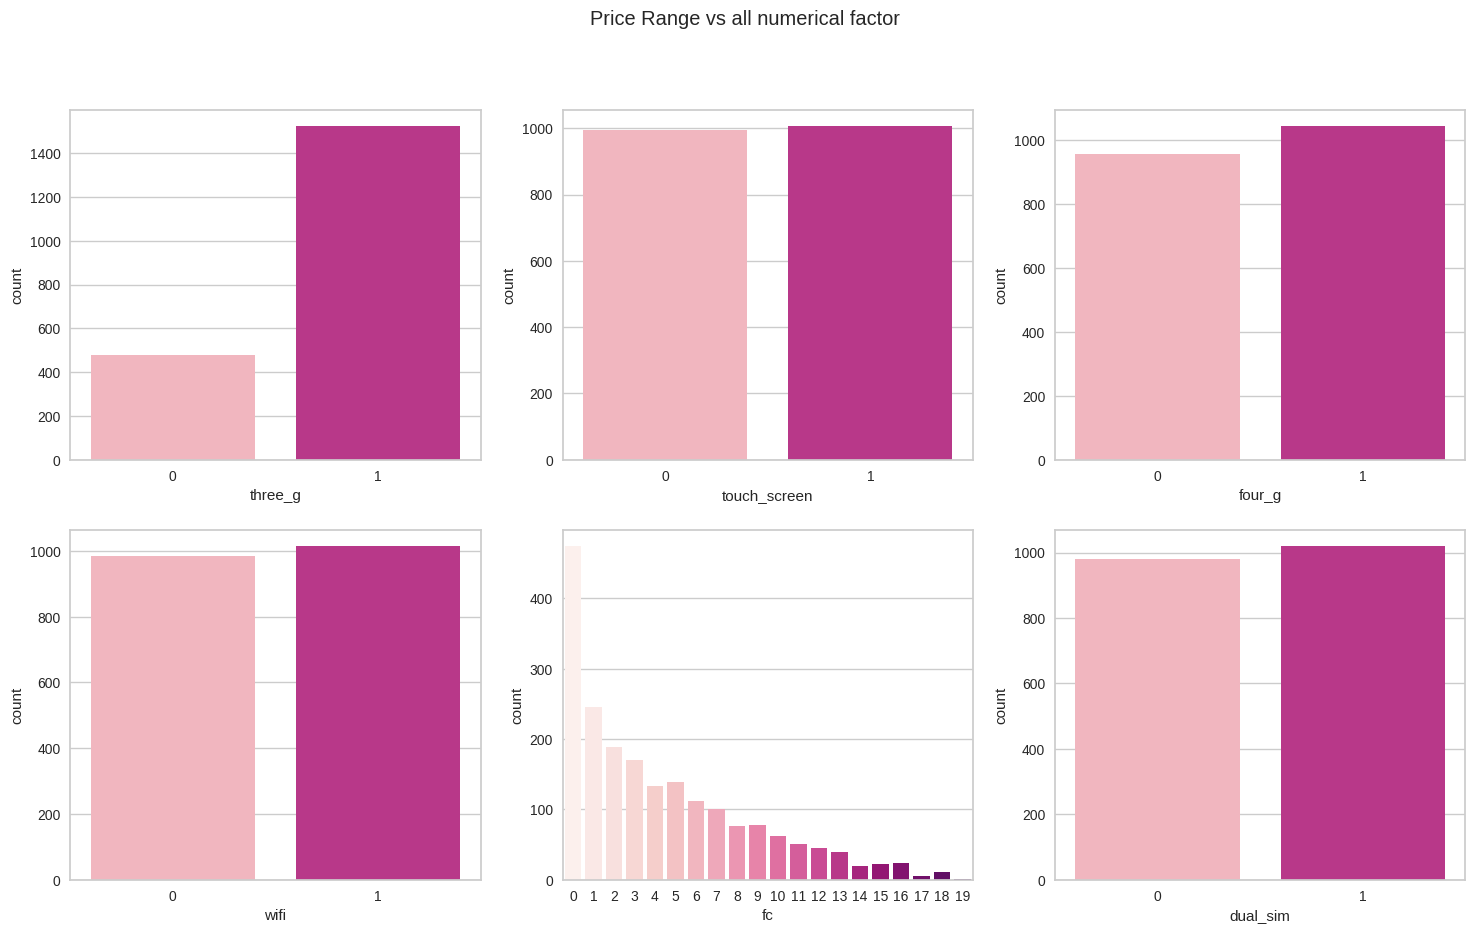

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=df_train, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=df_train, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=df_train, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=df_train, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = df_train, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = df_train, x ='dual_sim',palette='RdPu' )
plt.show()

<Axes: >

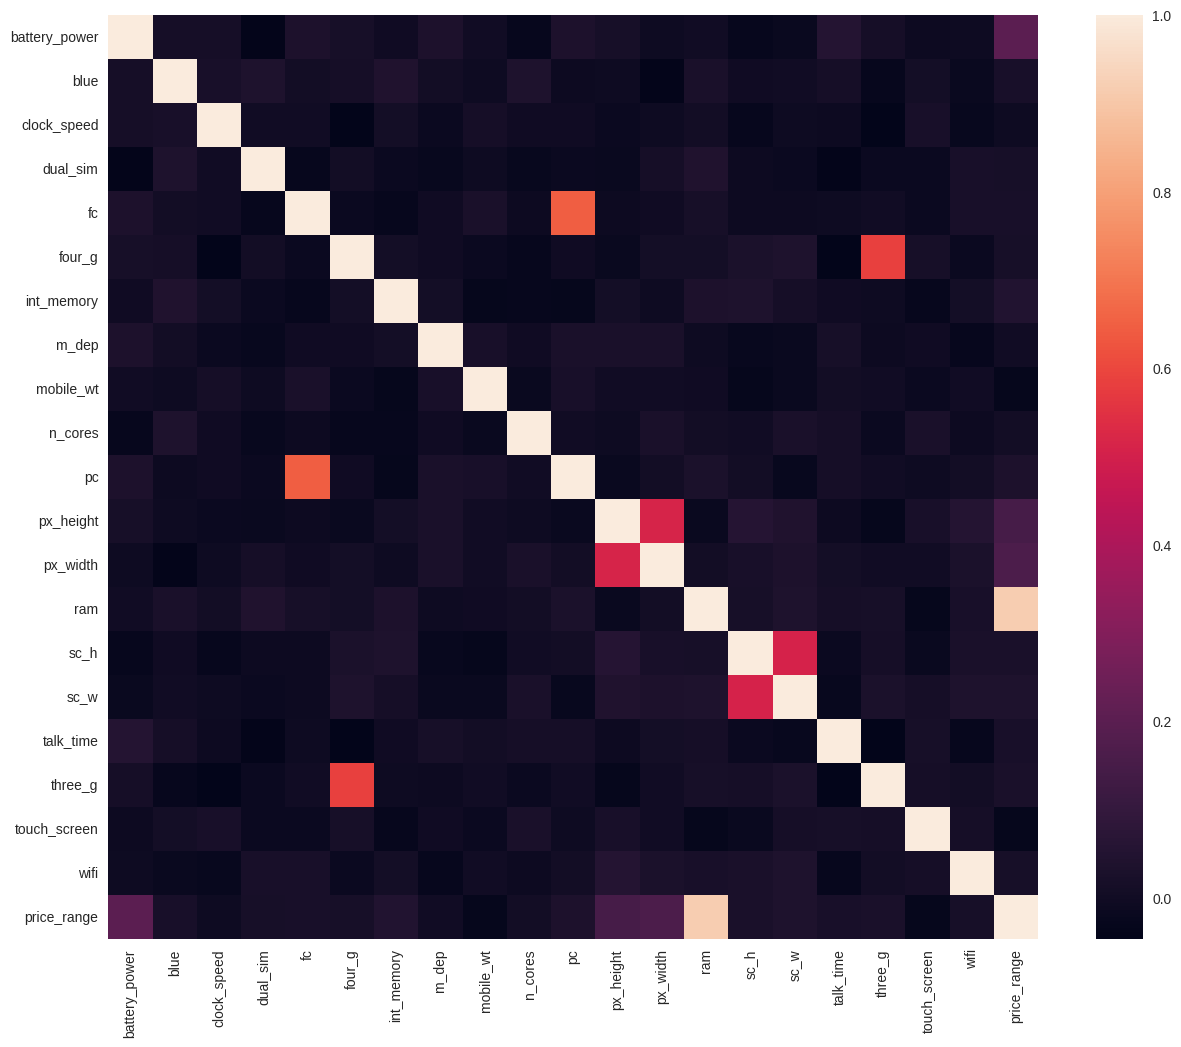

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr())

In [ ]:
print(f"Number of duplicate rows: {df_train.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# convert to numpy arrays and split features from labels
x = df_train.drop('price_range', axis=1).values
x_predict = df_test.drop('id', axis=1).values
y = df_train['price_range'].values

In [ ]:
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [ ]:
# OneHot Encoding for labels
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(20,), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
batch_size=16,
epochs=50,
verbose=1,
validation_split = 0.2,
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 80)]
)

Epoch 1/50
80/80 [==============================] - 2s 9ms/step - loss: 1.5175 - accuracy: 0.2523 - val_loss: 1.3810 - val_accuracy: 0.3156
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 1.4075 - accuracy: 0.2688 - val_loss: 1.3825 - val_accuracy: 0.2844
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 1.4013 - accuracy: 0.2617 - val_loss: 1.3804 - val_accuracy: 0.3344
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 1.3854 - accuracy: 0.2773 - val_loss: 1.3768 - val_accuracy: 0.3562
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 1.3752 - accuracy: 0.2875 - val_loss: 1.3681 - val_accuracy: 0.3812
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 1.3602 - accuracy: 0.3016 - val_loss: 1.3164 - val_accuracy: 0.5750
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 1.3256 - accuracy: 0.3562 - val_loss: 1.2108 - val_accuracy: 0.6625
Epoch 8/50
80/80 [==

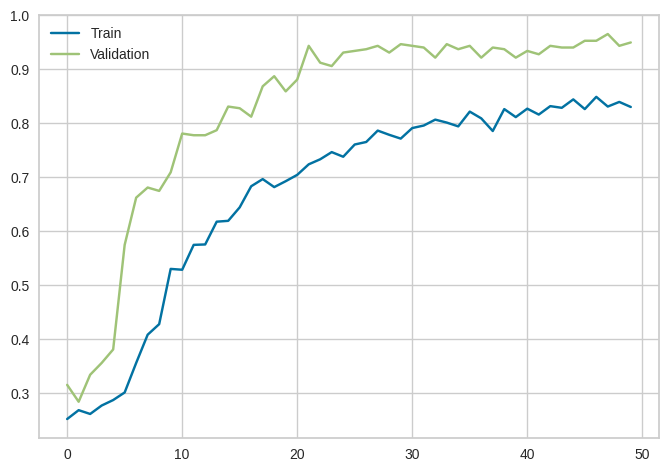

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['Train', 'Validation'])

plt.show()

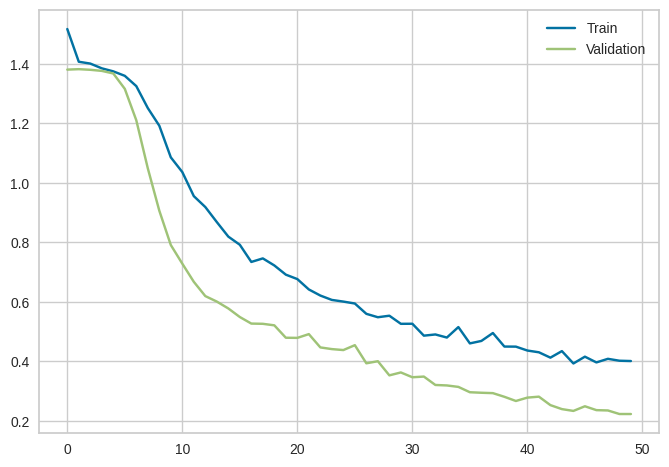

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['Train', 'Validation'])

In [ ]:
y_predict = model.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       103
           1       0.90      0.88      0.89        94
           2       0.96      0.91      0.93       100
           3       0.99      0.99      0.99       103

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



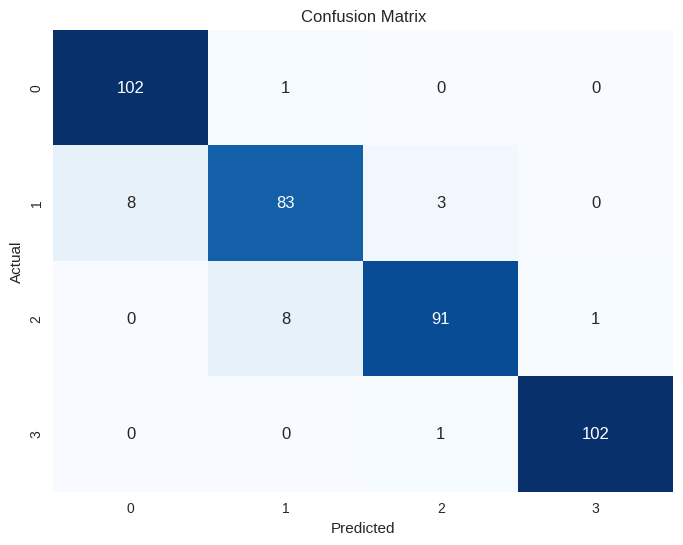

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a confusion matrix
cm = confusion_matrix(test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
data_test=pd.read_csv('/content/drive/MyDrive/final year  thesis/test.csv')

In [ ]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
